### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
import missingno as msno
from pingouin import plot_blandaltman

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset\train.csv")
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Dataset Understanding

In [3]:
df.ndim

2

In [4]:
df.shape

(891, 9)

In [5]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [6]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


### Handing Missing Values

**Checking for missing values**

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Visualization of missing values**

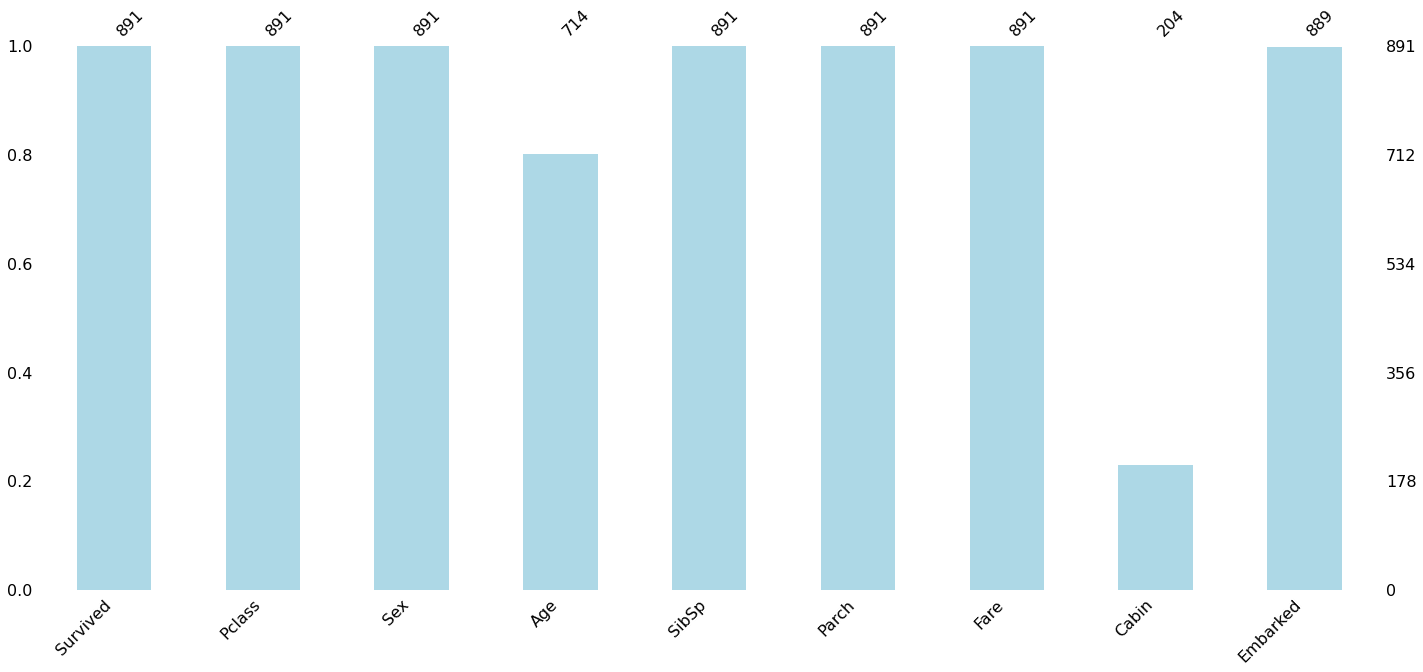

In [9]:
msno.bar(df, color="lightblue")
plt.show()

**Filling NaN values in age column by median value**

In [10]:
df["Age"].fillna(df.Age.median(), inplace=True)
df.Age.isna().any()

False

**Filling NaN values in deck column by Random value choices**

In [11]:
np.random.seed(42)
df["Cabin"].fillna(np.random.choice(df.Cabin.unique()), inplace=True)
df["Cabin"].isna().any()

False

**Dropping NaN values in embark_town and embarked columns**

In [12]:
df.dropna(inplace=True)

**Re-checking for Missing values**

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

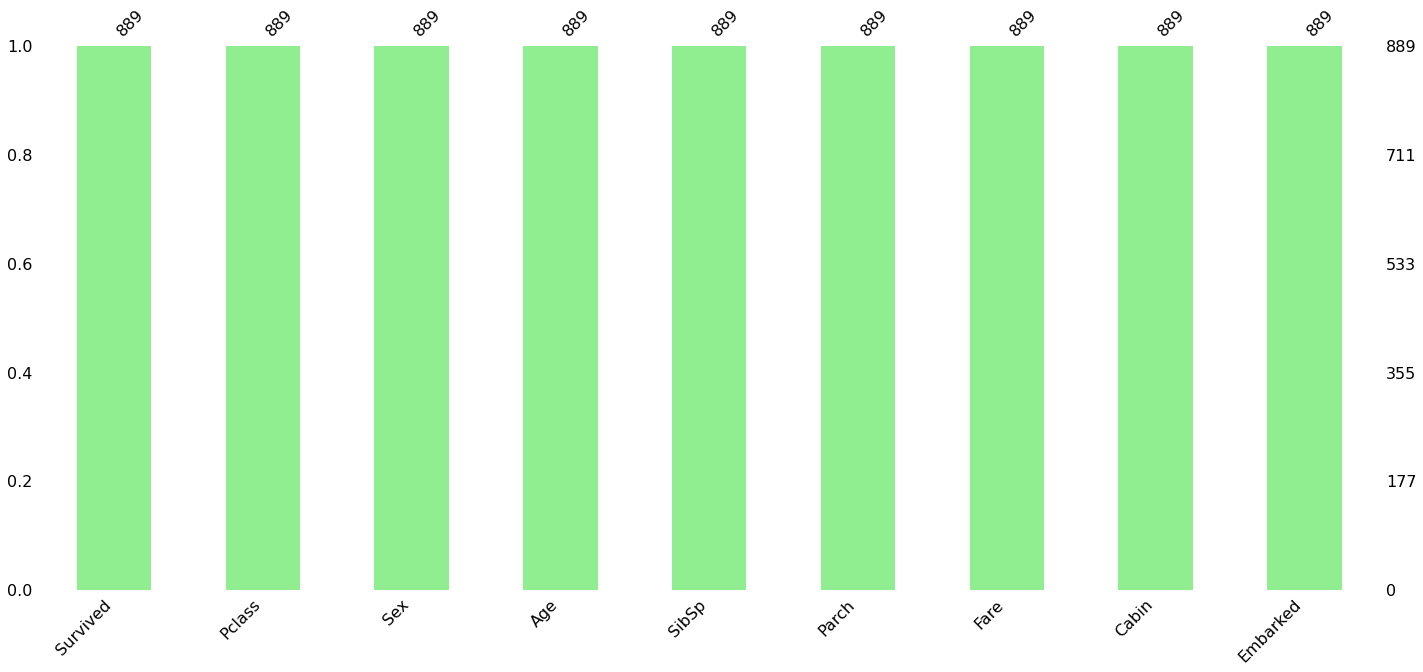

In [14]:
msno.bar(df, color="lightgreen")
plt.show()

**Value Counts for Categorical columns**

In [15]:
df["Survived"] = df.Survived.map({0: "Not Survived", 1: "Survived"})

In [16]:
df.Survived.value_counts()

Not Survived    549
Survived        340
Name: Survived, dtype: int64

In [17]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [18]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df["Cabin"] = df.Cabin.astype(str)
df["Cabin"] = df.Cabin.str.get(0)
df.Cabin.value_counts()

E    719
C     59
B     45
D     33
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [20]:
df["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

**Group by survived**

In [21]:
df.groupby(["Survived", "Sex"]).mean()

Pclass        Age     SibSp     Parch       Fare
Survived     Sex                                                       
Not Survived female  2.851852  25.666667  1.209877  1.037037  23.024385
             male    2.476496  30.783120  0.440171  0.207265  21.960993
Survived     female  1.926407  28.532468  0.519481  0.519481  51.695617
             male    2.018349  27.382294  0.385321  0.357798  40.821484

In [22]:
df.groupby(["Survived", "Sex"]).var()

Pclass         Age     SibSp     Parch         Fare
Survived     Sex                                                          
Not Survived female  0.202778  147.518750  3.292901  1.936111   616.096313
             male    0.579746  154.209286  1.296199  0.361660  1050.395086
Survived     female  0.694561  166.099485  0.546358  0.676793  4137.923910
             male    0.851512  232.117957  0.405708  0.417091  5091.674021

In [23]:
df.groupby(["Survived", "Sex"]).std()

Pclass        Age     SibSp     Parch       Fare
Survived     Sex                                                       
Not Survived female  0.450309  12.145730  1.814635  1.391442  24.821287
             male    0.761411  12.418103  1.138507  0.601382  32.409799
Survived     female  0.833403  12.887959  0.739160  0.822674  64.326697
             male    0.922774  15.235418  0.636952  0.645826  71.355967

In [24]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

In [25]:
def plot_numerical(var):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    sns.histplot(x=df[var], ax=axes[0][0], bins=20)
    sns.kdeplot(x=df[var], ax=axes[0][1], fill=True)
    sns.violinplot(x=df.Survived, y=df[var], ax=axes[1][0], palette="tab10")
    plot_blandaltman(x=df.Fare, y=df[var], ax=axes[1][1])
    plt.suptitle(var.title())
    plt.show()

In [26]:
def plot_kde(var):
    facet = sns.FacetGrid(df, hue="Survived", aspect=4, palette="bright")
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    plt.title(var.title())
    plt.show()

In [27]:
def plot_categorial(var):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    df[var].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df[var].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0][0],
    )

    df[var].value_counts().plot.barh(ax=ax[0][1])
    sns.countplot(x=df.Survived, hue=df[var], palette="viridis", ax=ax[1][0])
    sns.stripplot(x=df[var], y=df.Fare, hue=df.Survived, ax=ax[1][1], palette="magma")
    fig.suptitle(var.title())
    plt.show()

In [28]:
numerical_columns = ["Age", "SibSp", "Parch", "Fare"]

In [29]:
categorical_columns = ["Survived", "Sex", "Embarked"]

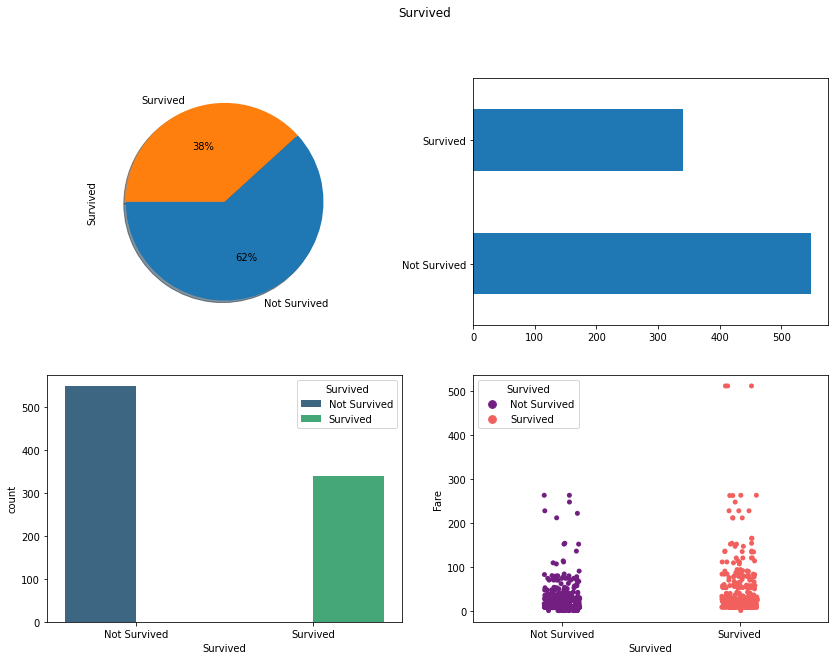

In [30]:
plot_categorial(categorical_columns[0])

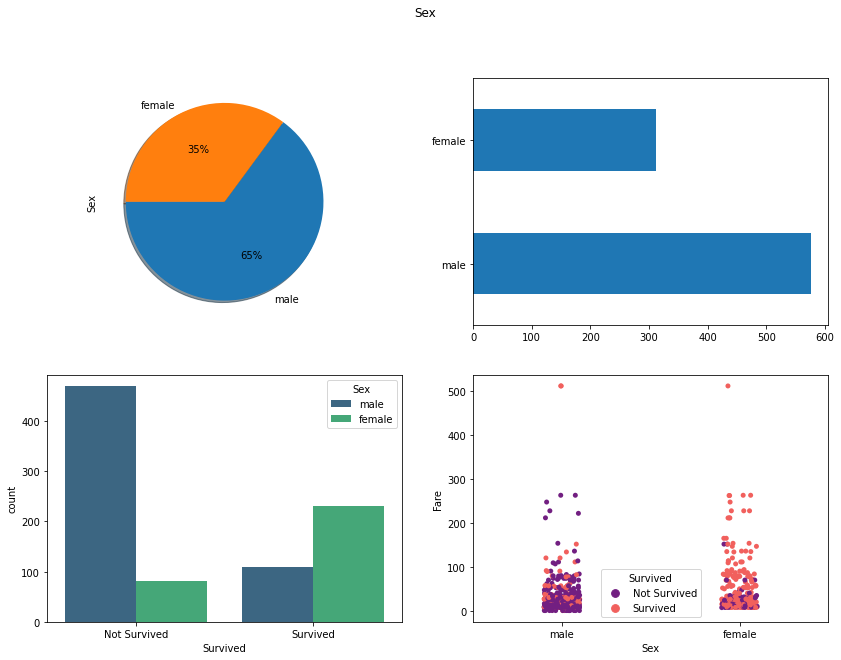

In [31]:
plot_categorial(categorical_columns[1])

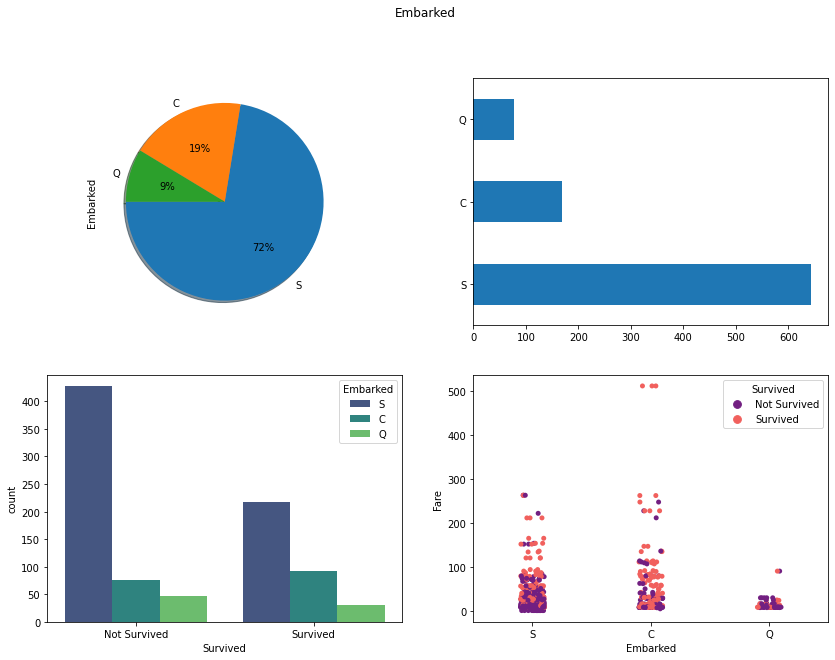

In [32]:
plot_categorial(categorical_columns[2])

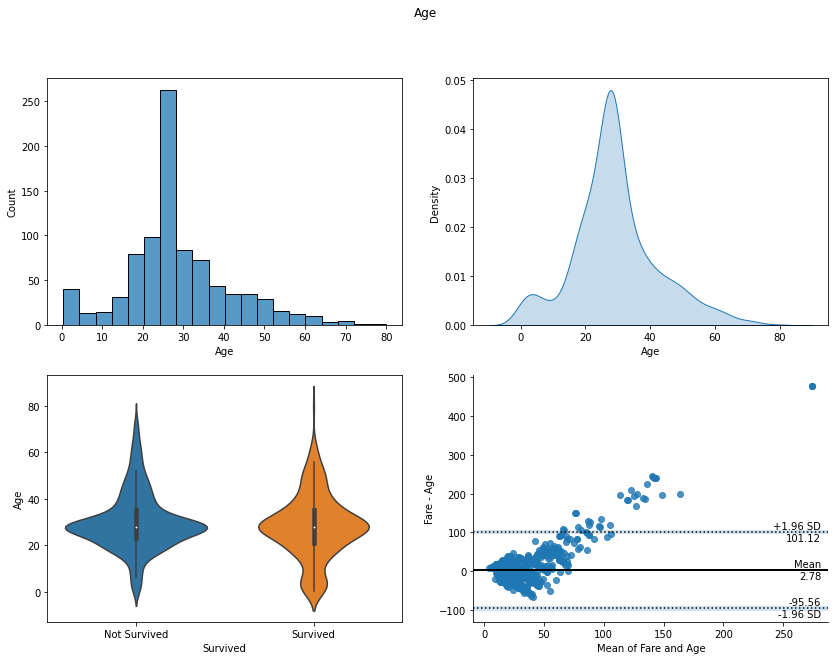

In [33]:
plot_numerical(numerical_columns[0])

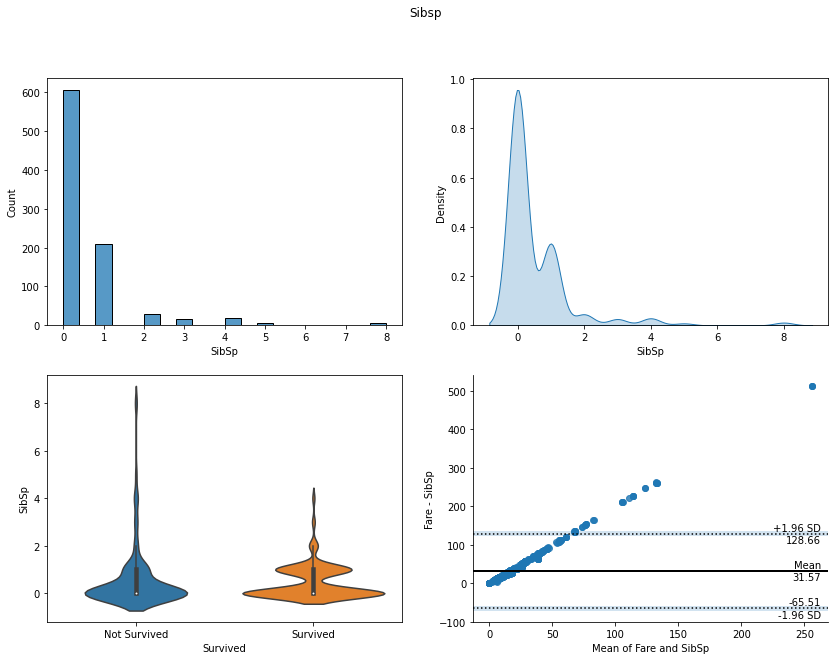

In [34]:
plot_numerical(numerical_columns[1])

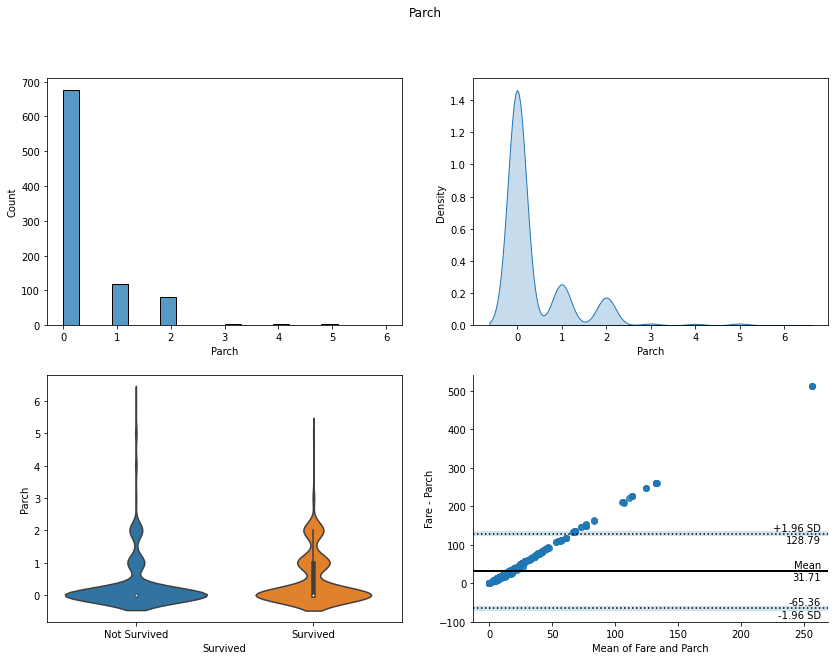

In [35]:
plot_numerical(numerical_columns[2])

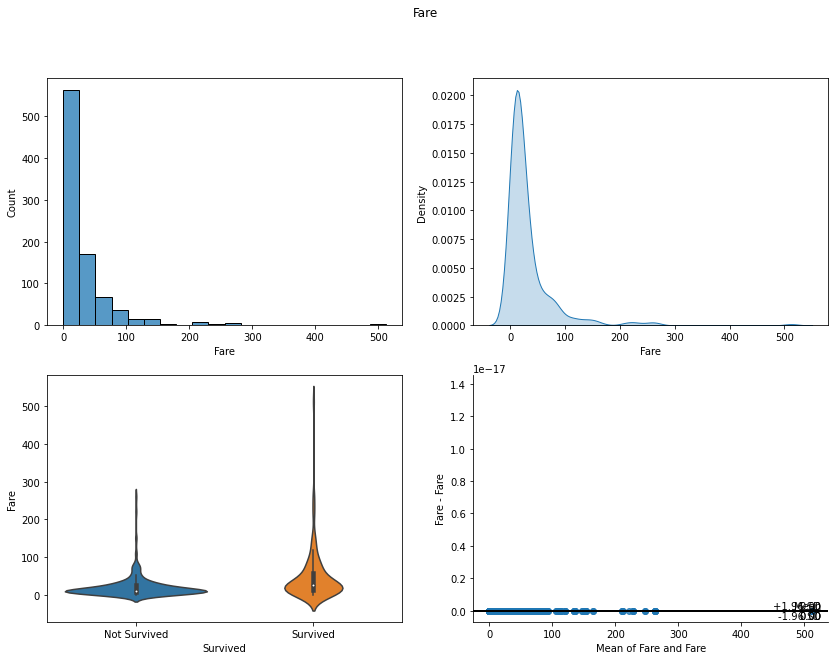

In [36]:
plot_numerical(numerical_columns[3])

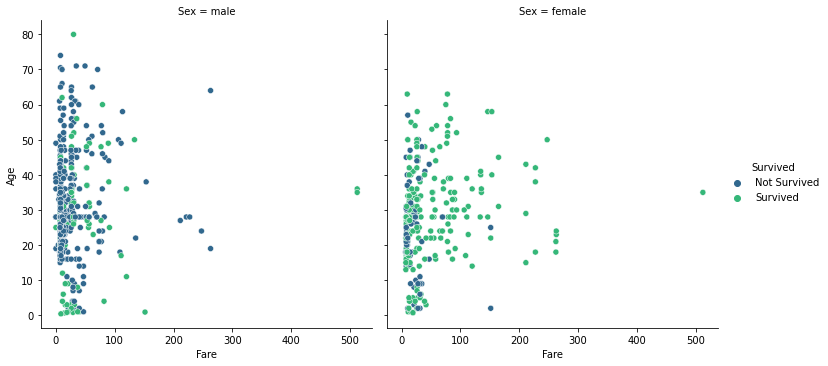

In [37]:
sns.relplot(x=df.Fare, y=df.Age, hue=df.Survived, col=df.Sex, palette="viridis")
plt.show()

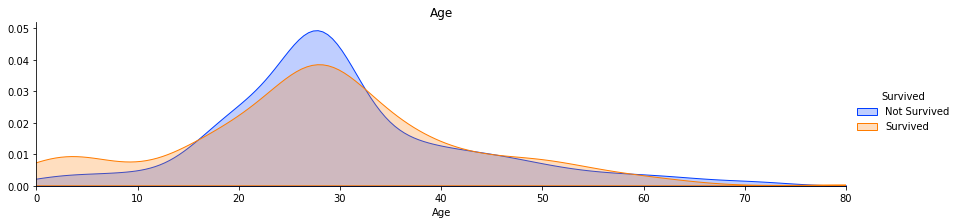

In [38]:
plot_kde(numerical_columns[0])

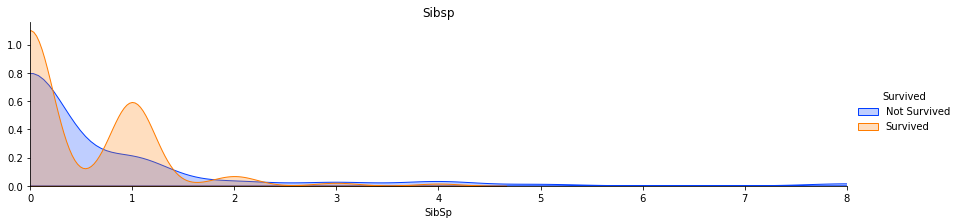

In [39]:
plot_kde(numerical_columns[1])

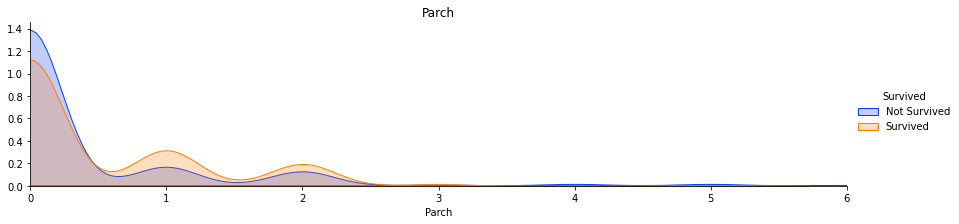

In [40]:
plot_kde(numerical_columns[2])

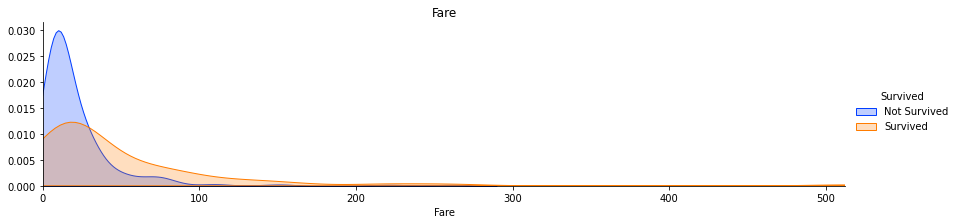

In [41]:
plot_kde(numerical_columns[3])

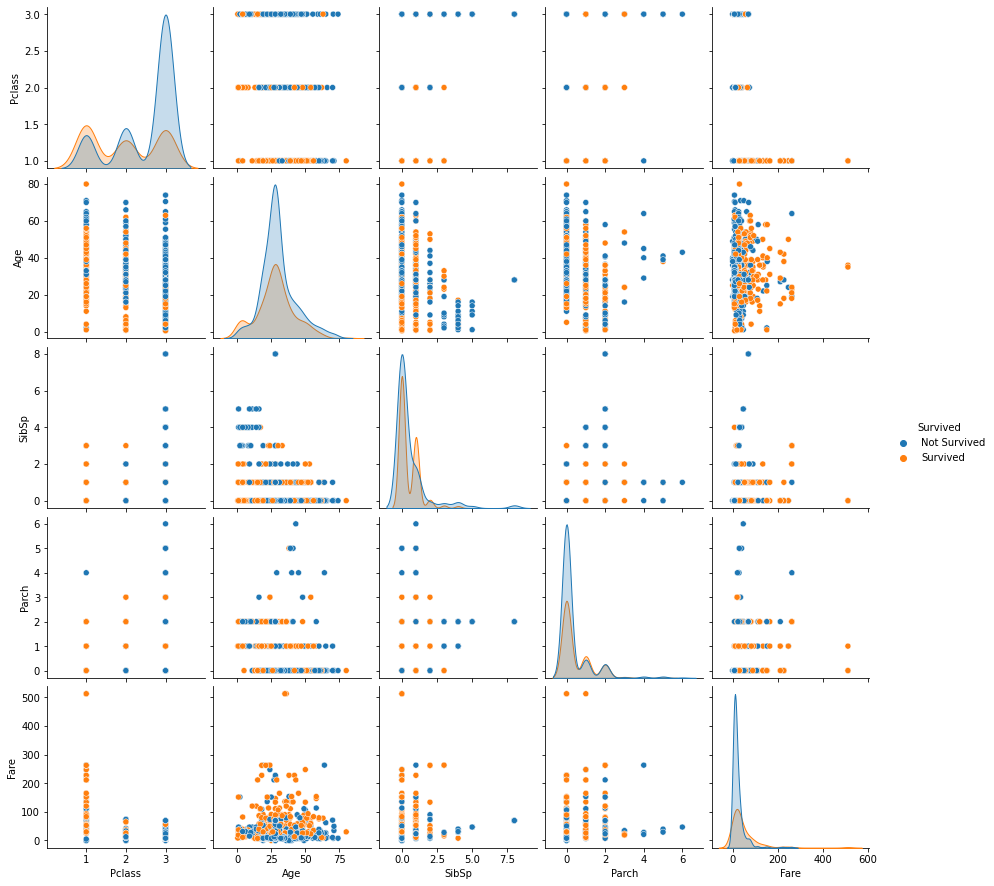

In [42]:
sns.pairplot(df, hue="Survived")
plt.show()

### Data Preprocessing

In [43]:
from yellowbrick.target import (
    FeatureCorrelation,
    BalancedBinningReference,
    ClassBalance,
)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [44]:
df["Survived"] = df.Survived.map({"Not Survived": 0, "Survived": 1})

In [45]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)
df.drop(["Cabin", "Embarked"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [46]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


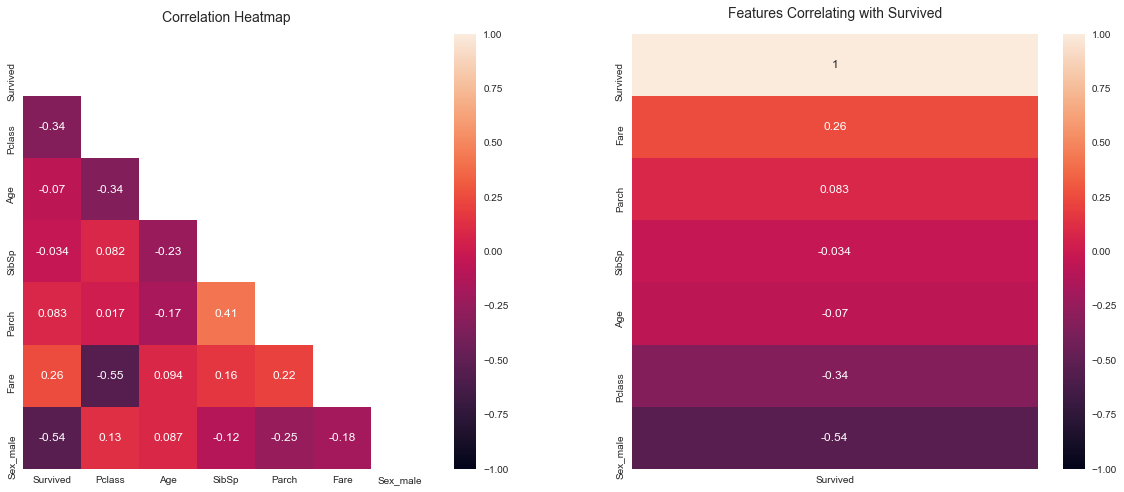

In [48]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0])
cat_heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 14}, pad=12)

heatmap = sns.heatmap(
    resign_corr[["Survived"]].sort_values(by="Survived", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
)
heatmap.set_title(
    "Features Correlating with Survived", fontdict={"fontsize": 14}, pad=16
)
plt.show()

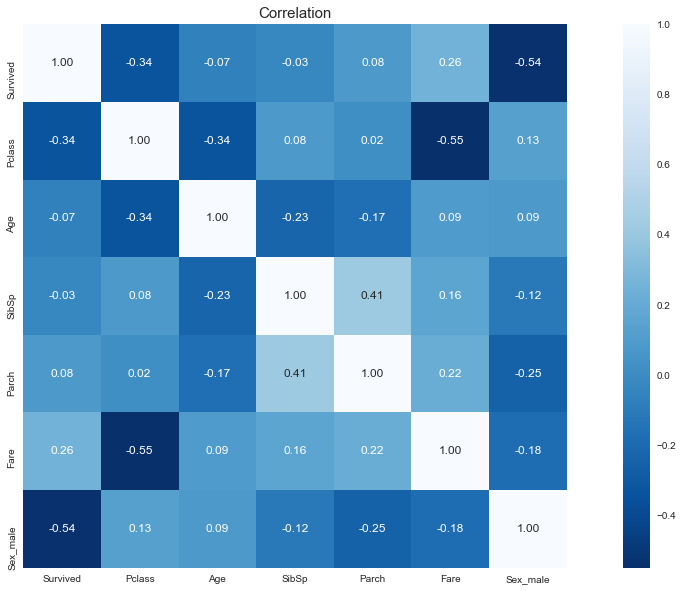

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", square=True, cmap="Blues_r")
plt.title("Correlation", size=15)
plt.show()

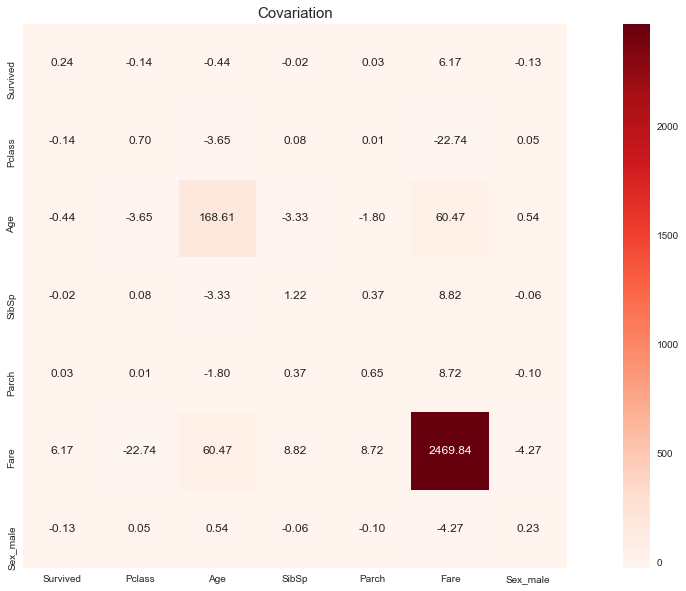

In [50]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.cov(), annot=True, fmt=".2f", square=True, cmap="Reds")
plt.title("Covariation", size=15)
plt.show()

### Data Splitting

In [51]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [52]:
X[:5]

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [53]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

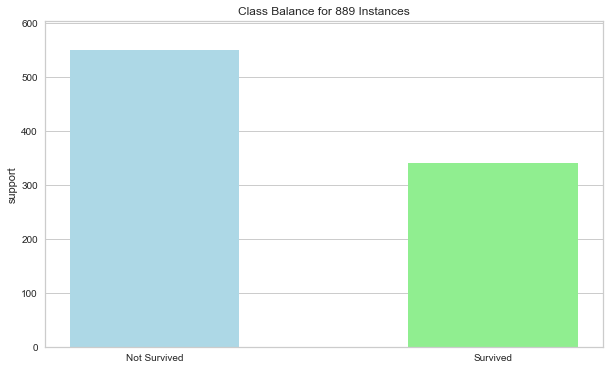

In [54]:
classes = ["Not Survived", "Survived"]
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

**Sampling Imbalanced Data**

In [55]:
from imblearn import combine

sme = combine.SMOTEENN(random_state=14)
X, y = sme.fit_resample(X, y)

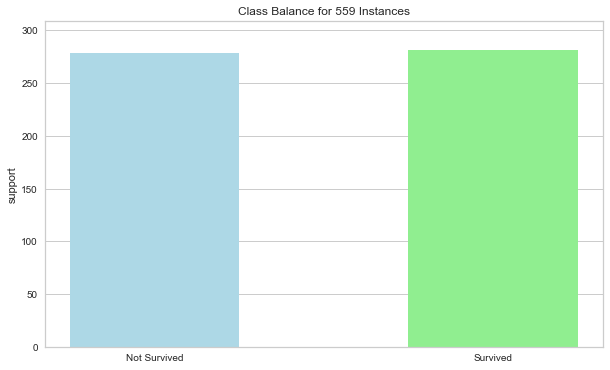

In [56]:
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

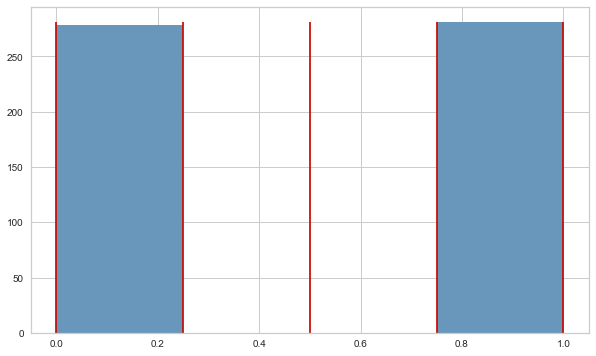

In [57]:
plt.figure(figsize=(10, 6))
visualizer = BalancedBinningReference()
visualizer.fit(y)
plt.show()

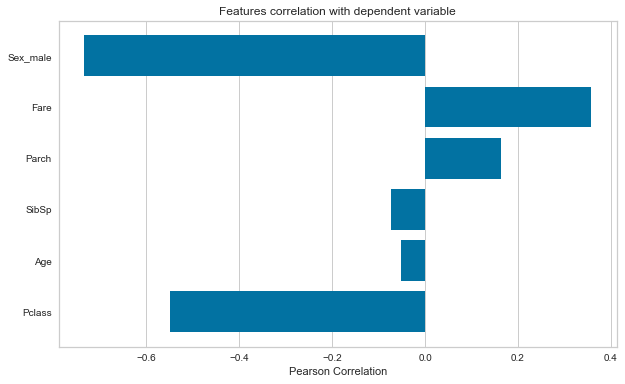

In [58]:
plt.figure(figsize=(10, 6))
visualizer = FeatureCorrelation(method="pearson")
visualizer.fit(X, y)
visualizer.show()
plt.show()

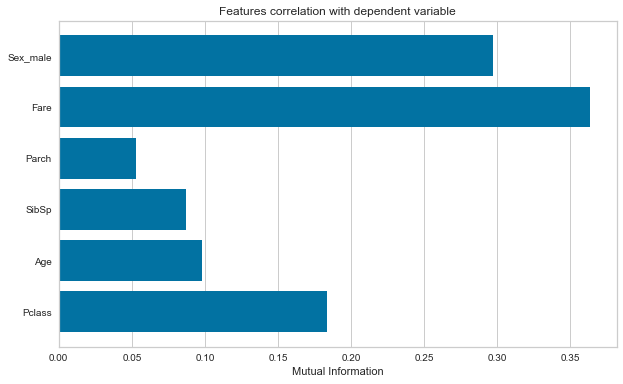

In [59]:
plt.figure(figsize=(10, 6))
visualizer = FeatureCorrelation(method="mutual_info-classification")
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[:5])

[[ 0.82569554 -0.47056147  0.42713841 -0.47463679 -0.47299944  0.9258201 ]
 [ 0.82569554  0.50887409 -0.41956503 -0.47463679 -0.4592231   0.9258201 ]
 [ 0.82569554 -0.62124387 -0.41956503 -0.47463679 -0.4592231   0.9258201 ]
 [ 0.82569554 -1.97738542  2.96724874  0.95953599 -0.09630259  0.9258201 ]
 [ 0.82569554 -0.01851429 -0.41956503 -0.47463679 -0.47342995  0.9258201 ]]


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [62]:
X_train[:5]

array([[ 0.82569554,  0.50887409, -0.41956503, -0.47463679, -0.4592231 ,
         0.9258201 ],
       [ 0.82569554, -0.92260866,  1.27384185, -0.47463679, -0.28787985,
         0.9258201 ],
       [-0.33986963,  2.16638043, -0.41956503, -0.47463679, -0.38517526,
         0.9258201 ],
       [ 0.82569554, -0.31987908, -0.41956503, -0.47463679, -0.46360053,
         0.9258201 ],
       [-0.33986963,  3.145816  , -0.41956503, -0.47463679, -0.41703305,
         0.9258201 ]])

In [63]:
X_test[:5]

array([[ 0.82569554, -0.84726746,  0.42713841,  0.95953599, -0.47335763,
         0.9258201 ],
       [-0.33986963, -0.08440459, -0.41956503, -0.47463679, -0.36105575,
        -1.08012345],
       [ 0.82569554, -0.01851429,  6.35406251,  2.39370876,  0.59983319,
        -1.08012345],
       [ 0.82569554,  0.13216811, -0.41956503, -0.47463679, -0.47335763,
         0.9258201 ],
       [ 0.82569554, -0.01851429,  2.1205453 ,  0.95953599, -0.15930008,
        -1.08012345]])

In [64]:
y_train[:5]

182    0
89     0
185    0
148    0
204    0
Name: Survived, dtype: int64

In [65]:
y_test[:5]

158    0
451    1
55     0
247    0
70     0
Name: Survived, dtype: int64

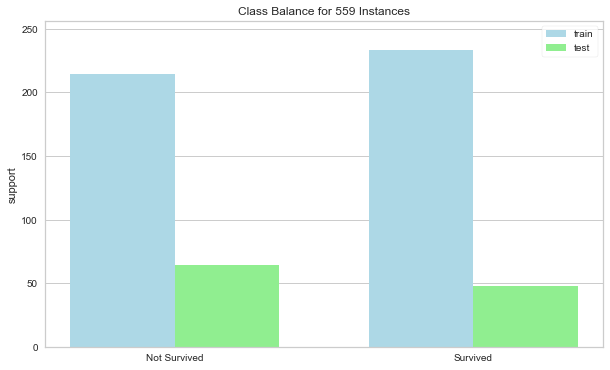

In [66]:
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

### Classification

In [67]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import class_prediction_error

In [68]:
from sklearn.naive_bayes import GaussianNB

gb_clf = GaussianNB()

In [69]:
gb_clf.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred = gb_clf.predict(X_test)

**Classification Accuracy:**

In [71]:
print(accuracy_score(y_test, y_pred))

0.9107142857142857


**Classification Error:**

In [72]:
print(1 - accuracy_score(y_test, y_pred))

0.0892857142857143


**Sensitivity/True Positive Rate/Recall Score**

In [73]:
print(recall_score(y_test, y_pred))

0.9166666666666666


**Precision Score:**

In [74]:
print(precision_score(y_test, y_pred))

0.88


**F1 Score**

In [75]:
print(f1_score(y_test, y_pred))

0.8979591836734694


**Class Prediction Error**

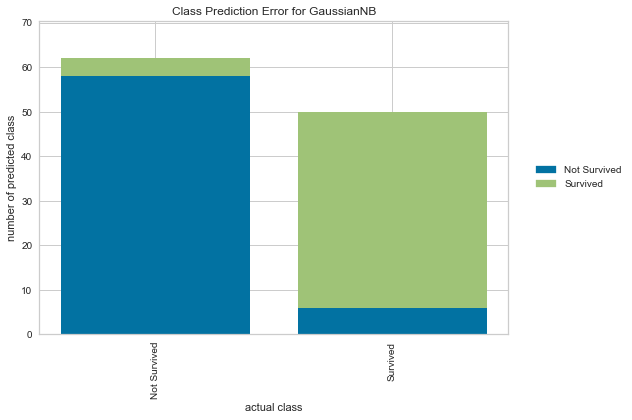

In [76]:
plt.figure(figsize=(10, 6))
visualizer = class_prediction_error(
    gb_clf, X_train, y_train, X_test, y_test, classes=classes
)
visualizer.show()
plt.show()

**ROC Curve**

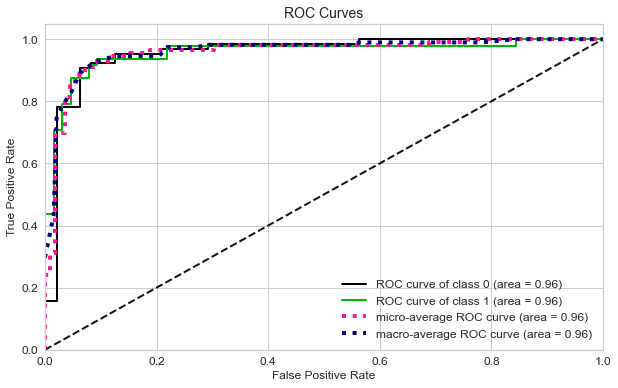

In [77]:
y_probas = gb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Precision Recall Curve**

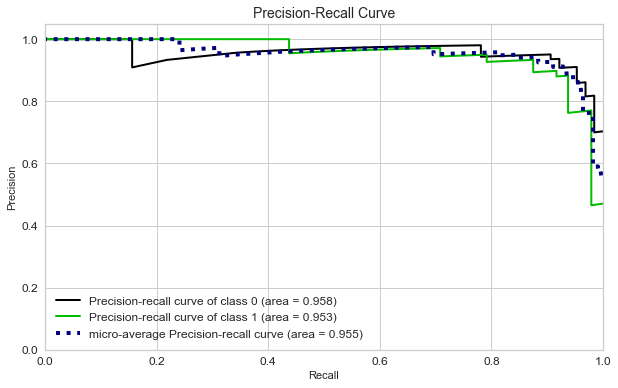

In [78]:
skplt.metrics.plot_precision_recall(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Learning Curve**

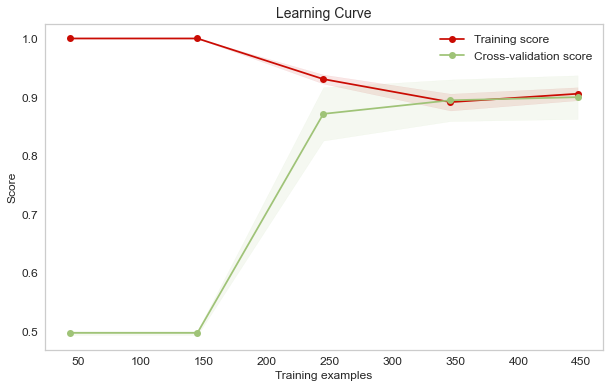

In [79]:
skplt.estimators.plot_learning_curve(
    gb_clf, X, y, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Lift Curve**

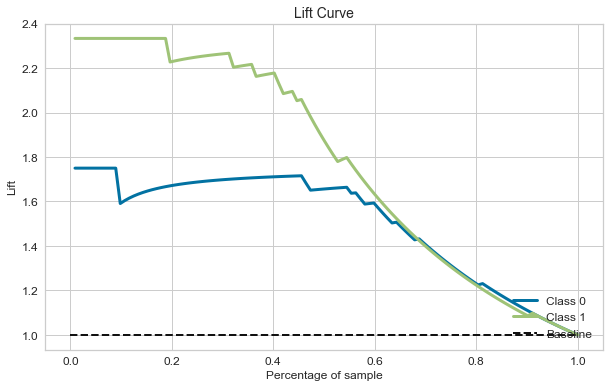

In [80]:
skplt.metrics.plot_lift_curve(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Cumulative Gains Curve**

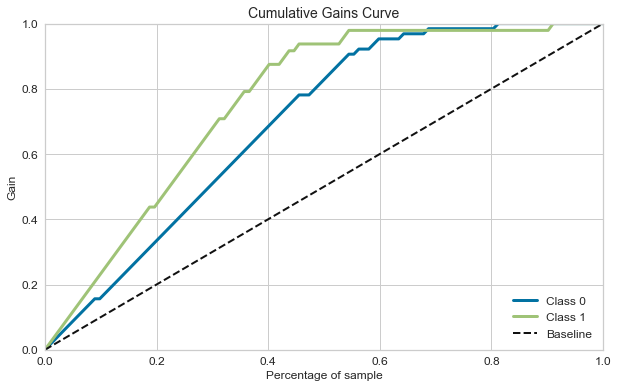

In [81]:
skplt.metrics.plot_cumulative_gain(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Confusion Matrix**

In [82]:
confusion_matrix(y_test, y_pred)

array([[58,  6],
       [ 4, 44]], dtype=int64)

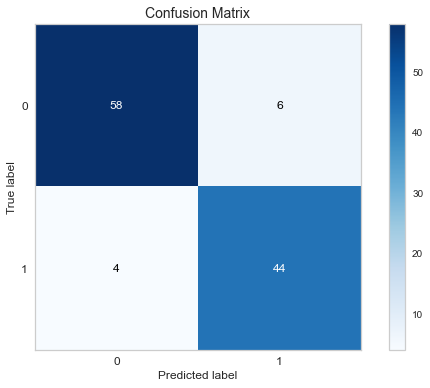

In [83]:
skplt.metrics.plot_confusion_matrix(
    y_test, y_pred, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.88      0.92      0.90        48

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.91      0.91      0.91       112



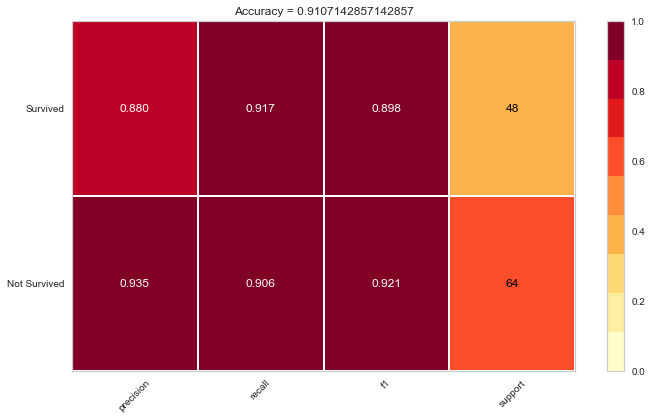

In [85]:
import yellowbrick as yb

plt.figure(figsize=(10, 6))
visualizer = yb.classifier.classification_report(
    gb_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    title="Accuracy = " + str(accuracy_score(y_test, y_pred)),
)
plt.show()